In [1]:
import numpy as np
import pandas as pd
import gender_guesser.detector as gd
import matplotlib.pyplot as plt


Dataframe = pd.read_csv("DatingAppReviewsDataset.csv")
Dataframe.drop("#ThumbsUp"  ,axis=1, inplace =True) # get rid of this column bc not needed
Dataframe.drop("Unnamed: 0" ,axis=1, inplace =True) # get rid of this column bc not needed
df_tinder =Dataframe[Dataframe["App"]== "Tinder"] 
df_tinder.head()


,Name,Review,Rating,Date&Time,App
0,linah sibanda,On this app i cant find a partner,5,18-02-2022 01:19,Tinder
1,Norman Johnson,Tinder would be so much better if we could spe...,3,18-02-2022 01:16,Tinder
2,David Hume,Still doesn't correctly notify matches or mess...,1,18-02-2022 01:11,Tinder
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,18-02-2022 01:11,Tinder
4,Arthur Magamedov,Love it!,5,18-02-2022 01:06,Tinder


#### add a new column for Year

In [2]:
tempDate = df_tinder['Date&Time']
Year=tempDate.str[6:10]
df_tinder = df_tinder.assign(Year = Year)
df_tinder.head()

,Name,Review,Rating,Date&Time,App,Year
0,linah sibanda,On this app i cant find a partner,5,18-02-2022 01:19,Tinder,2022
1,Norman Johnson,Tinder would be so much better if we could spe...,3,18-02-2022 01:16,Tinder,2022
2,David Hume,Still doesn't correctly notify matches or mess...,1,18-02-2022 01:11,Tinder,2022
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,18-02-2022 01:11,Tinder,2022
4,Arthur Magamedov,Love it!,5,18-02-2022 01:06,Tinder,2022


##### Find out the average rating 

In [3]:
df_tinder['Rating'].mean()

3.0107592629164324

#### Compare the average rating before and after the start of Corona Pandemic

In [4]:
df_tinder['Year'] = df_tinder[['Year']].apply(pd.to_numeric)
df_temp =df_tinder[df_tinder["Year"]<=2020 ]
before=df_temp['Rating'].mean()
print('Rating before Pandemic:'+str(before))
df_temp =df_tinder[df_tinder["Year"]>=2020 ]
after=df_temp['Rating'].mean()
print('Rating after Pandemic:'+str(after))

    

Rating before Pandemic:3.106673774595298
Rating after Pandemic:2.5304246596866116


In [ ]:
# Find out the distribution of downloads (comments) over years 


In [5]:
uniqueValues = df_tinder['Year'].unique()
for value in uniqueValues:
 count= df_tinder[df_tinder['Year'] ==value]['Name'].count()
 print('in '+str(value )+' '+str( count) +' people have commented')

in 2022 8202 people have commented
in 2021 62583 people have commented
in 2020 69230 people have commented
in 2019 87438 people have commented
in 2018 69639 people have commented
in 2017 64409 people have commented
in 2016 62004 people have commented
in 2015 57797 people have commented
in 2014 37151 people have commented
in 2013 8158 people have commented


In [6]:
df_temp =df_tinder[df_tinder["Year"]==2022 ]
count= df_temp[df_temp['Rating'] == 5 ]['Name'].count()
print(count)

2099


# create new dataframe for Bumble from the given dataSet & add Column for Year  

In [7]:
df_bumble =Dataframe[Dataframe["App"]== "Bumble"]
tempDate = df_bumble['Date&Time']
Year=tempDate.str[6:10]
df_bumble = df_bumble.assign(Year = Year)
df_bumble.head()

,Name,Review,Rating,Date&Time,App,Year
526616,mihai matei,"Dacă nu ar cere mereu bani pentru orice like, ...",4,18-02-2022 00:58,Bumble,2022
526617,Khy McCabe,"Can't seem to log into account, I've tried so ...",1,18-02-2022 00:53,Bumble,2022
526618,rob cif,Limited views without paying money. 90% fake a...,1,18-02-2022 00:53,Bumble,2022
526619,abhishek bhatia,This is the most trusted but worst app. This a...,1,18-02-2022 00:25,Bumble,2022
526620,Anthony Chidozie,Pretty good so far,5,18-02-2022 00:10,Bumble,2022


In [ ]:
# find out which year was Bumble published from the given data set 

In [8]:
uniqueValues = df_bumble['Year'].unique()
publishingYear = min(uniqueValues)
print('The publishing year of Bumble was probably '+str(publishingYear) )

The publishing year of Bumble was probably 2015


#### Estimate the genders of people who rated Bumble 1 out of 5  in 2015

In [ ]:
# first lets find out the names of the people who rated 1 
# than lets try estimate the gender by using gender guesser library

In [9]:
df_bumble['Year'] = df_bumble[['Year']].apply(pd.to_numeric)
df_temp =df_bumble[df_bumble["Year"]==2015 ]
names= df_temp[df_temp['Rating'] == 1]['Name']
gender =[]
detector = gd.Detector(case_sensitive=False)
for name in names :
     firstName=name.rpartition(' ')[0]
     gender.append(detector.get_gender(name=firstName))
print (gender)



['male', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'mostly_female', 'unknown', 'male', 'male', 'female', 'female', 'male', 'unknown', 'male', 'female', 'male', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'unknown', 'female', 'unknown', 'female', 'male', 'unknown', 'mostly_female', 'female', 'male', 'mostly_male', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'andy', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'female', 'male', 'male', 'unknown', 'female', 'female', 'male', 'male', 'unknown', 'male']


In [ ]:
#lets put them in  a new dataframe

In [10]:
ratedOne= pd.DataFrame(columns=['Name', 'Gender'])
ratedOne= ratedOne.assign(Name= names)
ratedOne= ratedOne.assign(Gender= gender)
ratedOne.head()

,Name,Gender
628832,Evan Michelson,male
628833,Zak Klemarow,male
628835,A Google user,unknown
628836,Adam McVicar,male
628837,Scott Warren,male


In [ ]:
#clear data  (some genders are unknown) or not precise estimations

In [11]:
ratedOne.drop(ratedOne[ratedOne['Gender'] == "unknown"].index, inplace = True)
ratedOne[ratedOne["Gender"].str.contains("mostly")==False]
ratedOne.head()

,Name,Gender
628832,Evan Michelson,male
628833,Zak Klemarow,male
628836,Adam McVicar,male
628837,Scott Warren,male
628838,Florian Grohmann,male


In [ ]:
#lets find percentages of male and female 

In [12]:
countMale= ratedOne[ratedOne['Gender'] == 'male' ]['Name'].count()
countFemale= ratedOne[ratedOne['Gender'] == 'female' ]['Name'].count()
total= countMale+countFemale
percentageMale= (100*countMale /total)
percentageMale= round(percentageMale,2)
percentageFemale= (100-percentageMale)
percentageFemale= round(percentageFemale,2)

print("In 2015 the "+str(percentageMale)+"% of the users that rated Bumble 1 was male")
print("In 2015 the "+str(percentageFemale)+"% of the users that rated Bumble 1 was female")

In 2015 the 75.41% of the users that rated Bumble 1 was male
In 2015 the 24.59% of the users that rated Bumble 1 was female


In [ ]:
#lets find percentages of male and female using matplotlib and display it as a piechart

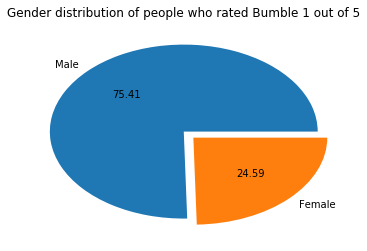

In [13]:
Gender =['Male','Female']
Percent = [countMale,countFemale]
explode=[0.0,0.1]
plt.pie(Percent,explode=explode,labels=Gender, autopct='%1.2f')
plt.title('Gender distribution of people who rated Bumble 1 out of 5' )
plt.show()

In [ ]:
#compare comment count of different apps over years

In [ ]:
# first create a new dataframe for Hinge 

In [14]:
df_hinge =Dataframe[Dataframe["App"]== "Hinge"] 
tempDate = df_hinge['Date&Time']
Year=tempDate.str[6:10]
df_hinge = df_hinge.assign(Year = Year)
df_hinge['Year'] = df_hinge[['Year']].apply(pd.to_numeric)
df_hinge.head()



,Name,Review,Rating,Date&Time,App,Year
629000,Ana Lilia Montoya,Perfect,5,18-02-2022 00:42,Hinge,2022
629001,Chaddy B,There may have been truth to Hinge's claims th...,2,18-02-2022 00:26,Hinge,2022
629002,Daniel S.,Found someone... And isn't that all that counts?,5,17-02-2022 23:51,Hinge,2022
629003,Joe Johnson,This app is horribly messed up!! They take the...,1,17-02-2022 23:32,Hinge,2022
629004,Pat Gunter,!Needs a darkmode! SO white. It flashes a scre...,4,17-02-2022 23:14,Hinge,2022


In [ ]:
# now create the dataframe to be displayed

In [15]:
df = pd.DataFrame(columns=['App','Year','comment_count','Rating'])
uniqueValues = df_tinder['Year'].unique()
uniqueValues = np.delete(uniqueValues , np.where(uniqueValues  == 2022))
for value in uniqueValues:
    count= df_tinder[df_tinder['Year'] ==value]['Name'].count()
    df_temp1 =df_tinder[df_tinder["Year"]==value]
    rating =df_temp1['Rating'].mean()
    df2 = {'App': 'Tinder', 'Year': value, 'comment_count': count, 'Rating':rating}
    df= df.append(df2, ignore_index = True)
uniqueValues = df_bumble['Year'].unique()
uniqueValues = np.delete(uniqueValues , np.where(uniqueValues  == 2022))
for value in uniqueValues:
  count= df_bumble[df_bumble['Year'] ==value]['Name'].count()
  df_temp2 =df_bumble[df_bumble["Year"]==value]
  rating =df_temp2['Rating'].mean()
  df2 = {'App': 'Bumble', 'Year': value, 'comment_count': count,'Rating':rating}
  df= df.append(df2, ignore_index = True)
uniqueValues = df_hinge['Year'].unique()
uniqueValues = np.delete(uniqueValues, np.where(uniqueValues == 2022))
for value in uniqueValues:
  count= df_hinge[df_hinge['Year'] ==value]['Name'].count()
  df_temp3 =df_hinge[df_hinge["Year"]==value]
  rating =df_temp3['Rating'].mean()
  df2 = {'App': 'Hinge', 'Year': value, 'comment_count': count,'Rating':rating}
  df = df.append(df2, ignore_index = True)

df.head()

,App,Year,comment_count,Rating
0,Tinder,2021,62583,2.396389
1,Tinder,2020,69230,2.670812
2,Tinder,2019,87438,3.151044
3,Tinder,2018,69639,3.380821
4,Tinder,2017,64409,3.265537


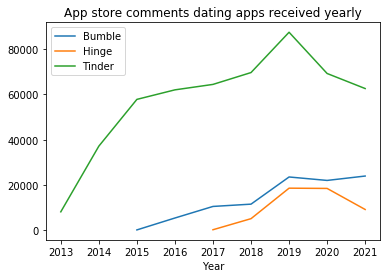

In [16]:
df['Year'] = df[['Year']].apply(pd.to_numeric)
df.set_index('Year', inplace=True)
df.groupby('App')['comment_count'].plot(legend=True)
plt.title('App store comments dating apps received yearly')
plt.show()


In [ ]:
# create a graph for ratings over the years

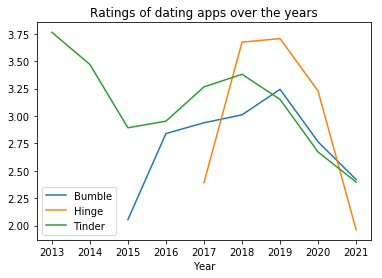

In [17]:

df.groupby('App')['Rating'].plot(legend=True)
plt.title('Ratings of dating apps over the years')
plt.show()